In [1]:
import pandas as pd

# Load datasets
train = pd.read_csv("Train.csv")
train_trimmed = pd.read_csv("Train_trimmed.csv")
test = pd.read_csv("Test.csv")
test_trimmed = pd.read_csv("Test_trimmed.csv")
sample_submission = pd.read_csv("SampleSubmission.csv")

# Standardize column names
train.columns = train.columns.str.lower()
train_trimmed.columns = train_trimmed.columns.str.lower()
test.columns = test.columns.str.lower()
test_trimmed.columns = test_trimmed.columns.str.lower()

# Identify target columns
target_cols = ['hdl_cholesterol_human', 'cholesterol_ldl_human', 'hemoglobin(hgb)_human']

# Dataset summaries
train_info = {
    "shape": train.shape,
    "missing_values": train.isnull().sum().sum(),
    "sample_columns": train.columns[:10].tolist(),
    "unique_target_values": {col: train[col].nunique() for col in target_cols},
    "target_value_counts": {col: train[col].value_counts().to_dict() for col in target_cols}
}

train_trimmed_info = {
    "shape": train_trimmed.shape,
    "missing_values": train_trimmed.isnull().sum().sum(),
    "sample_columns": train_trimmed.columns[:10].tolist()
}

test_info = {
    "shape": test.shape,
    "missing_values": test.isnull().sum().sum(),
    "sample_columns": test.columns[:10].tolist()
}

test_trimmed_info = {
    "shape": test_trimmed.shape,
    "missing_values": test_trimmed.isnull().sum().sum(),
    "sample_columns": test_trimmed.columns[:10].tolist()
}

sample_submission_info = {
    "shape": sample_submission.shape,
    "columns": sample_submission.columns.tolist()
}

# Final summary
dataset_overview = {
    "train": train_info,
    "train_trimmed": train_trimmed_info,
    "test": test_info,
    "test_trimmed": test_trimmed_info,
    "sample_submission": sample_submission_info
}

dataset_overview


{'train': {'shape': (13140, 176),
  'missing_values': 0,
  'sample_columns': ['reading_id',
   'absorbance0',
   'absorbance1',
   'absorbance2',
   'absorbance3',
   'absorbance4',
   'absorbance5',
   'absorbance6',
   'absorbance7',
   'absorbance8'],
  'unique_target_values': {'hdl_cholesterol_human': 3,
   'cholesterol_ldl_human': 3,
   'hemoglobin(hgb)_human': 3},
  'target_value_counts': {'hdl_cholesterol_human': {'ok': 7500,
    'low': 3060,
    'high': 2580},
   'cholesterol_ldl_human': {'ok': 7320, 'high': 5220, 'low': 600},
   'hemoglobin(hgb)_human': {'ok': 11700, 'high': 900, 'low': 540}}},
 'train_trimmed': {'shape': (13140, 154),
  'missing_values': 0,
  'sample_columns': ['reading_id',
   'absorbance0',
   'absorbance1',
   'absorbance2',
   'absorbance3',
   'absorbance4',
   'absorbance5',
   'absorbance6',
   'absorbance7',
   'absorbance8']},
 'test': {'shape': (3660, 173),
  'missing_values': 0,
  'sample_columns': ['reading_id',
   'absorbance0',
   'absorbance1',

In [2]:
# Define target columns
target_columns = ['hdl_cholesterol_human', 'cholesterol_ldl_human', 'hemoglobin(hgb)_human']

# Extract basic dataset statistics
train_summary = {
    "shape": train.shape,
    "sample_columns": train.columns[:10].tolist(),
    "missing_values_total": train.isnull().sum().sum(),
    "unique_target_counts": {col: train[col].nunique() for col in target_columns},
    "target_distributions": {col: train[col].value_counts().to_dict() for col in target_columns}
}

train.head()


,reading_id,absorbance0,absorbance1,absorbance2,absorbance3,absorbance4,absorbance5,absorbance6,absorbance7,absorbance8,...,absorbance165,absorbance166,absorbance167,absorbance168,absorbance169,temperature,humidity,hdl_cholesterol_human,hemoglobin(hgb)_human,cholesterol_ldl_human
0,ID_3SSHI56C,0.479669,0.477423,0.487956,0.491831,0.500516,0.502590,0.511561,0.514639,0.524245,...,1.218660,1.213038,1.198317,1.195735,1.180846,42.51,34.01,ok,ok,ok
1,ID_599OOLZA,0.471537,0.474113,0.479981,0.485528,0.491049,0.497942,0.504760,0.510543,0.522328,...,1.304501,1.323005,1.305992,1.263887,1.262095,44.52,32.09,ok,high,high
2,ID_MVJGPQ75,0.444998,0.458034,0.447386,0.456921,0.463225,0.475983,0.476817,0.481565,0.490010,...,1.325059,1.271115,1.337119,1.289877,1.345229,45.77,24.80,ok,ok,high
3,ID_CK6RF8YV,0.513434,0.513303,0.522609,0.521068,0.523146,0.530132,0.539517,0.546364,0.552414,...,1.298422,1.299873,1.311157,1.303259,1.349833,45.84,36.93,low,ok,high
4,ID_82N6QE6I,0.510485,0.519359,0.524225,0.528419,0.535273,0.545342,0.550314,0.557129,0.567030,...,1.272367,1.290032,1.339771,1.322738,1.348964,38.92,23.88,ok,ok,high


In [3]:
%pip install pandas numpy matplotlib seaborn scikit-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


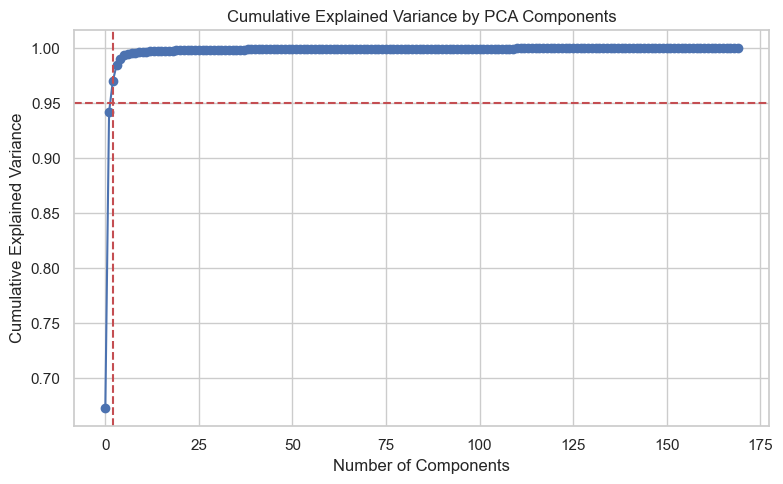

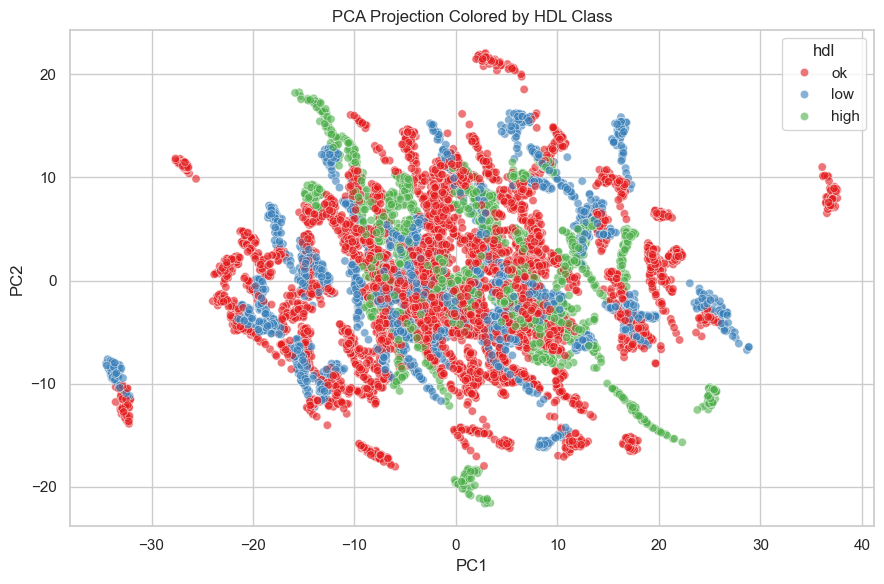

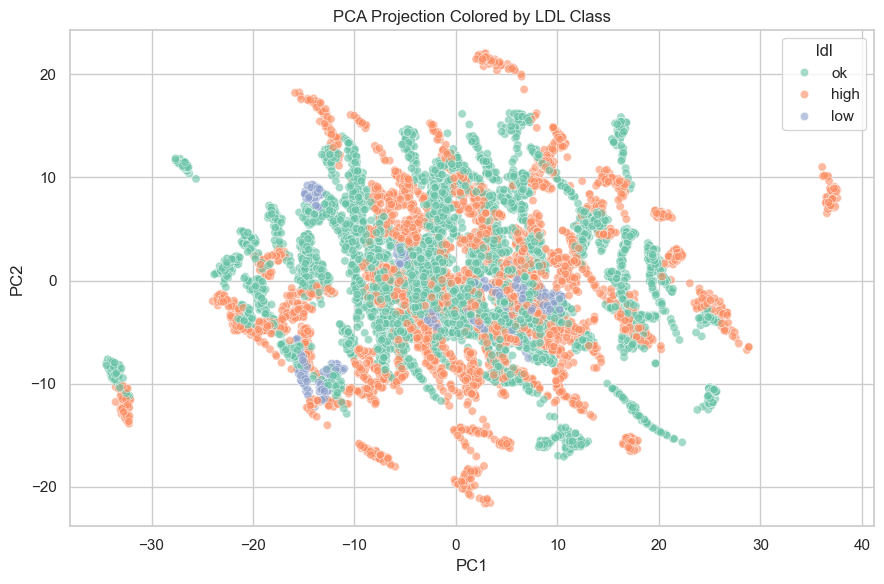

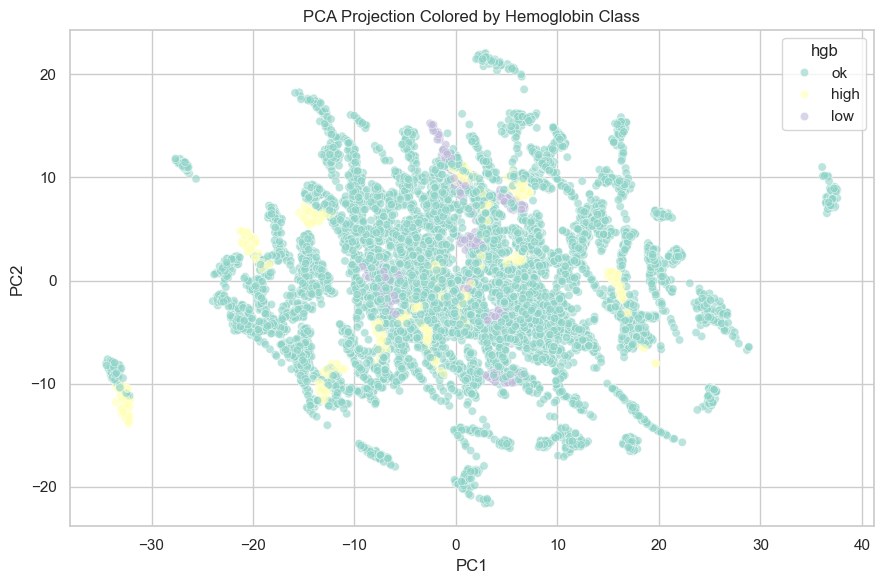

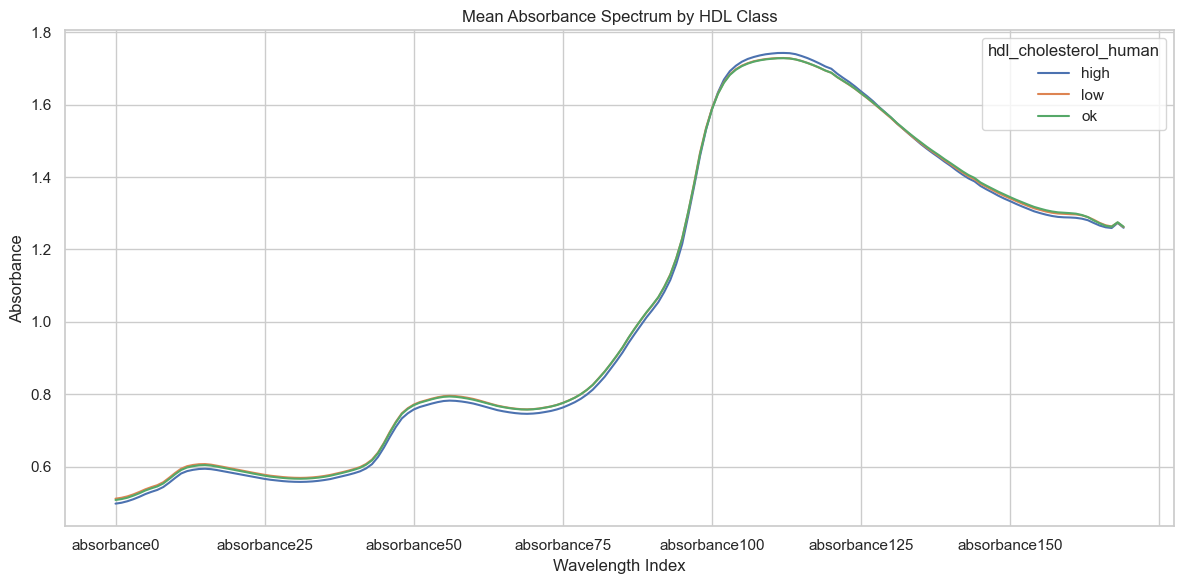

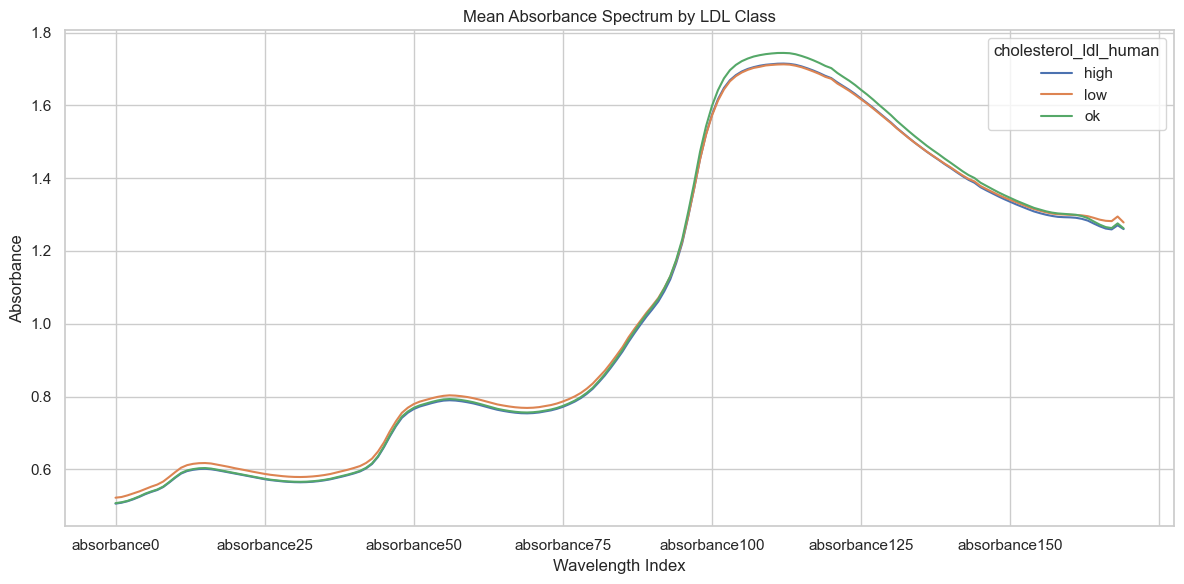

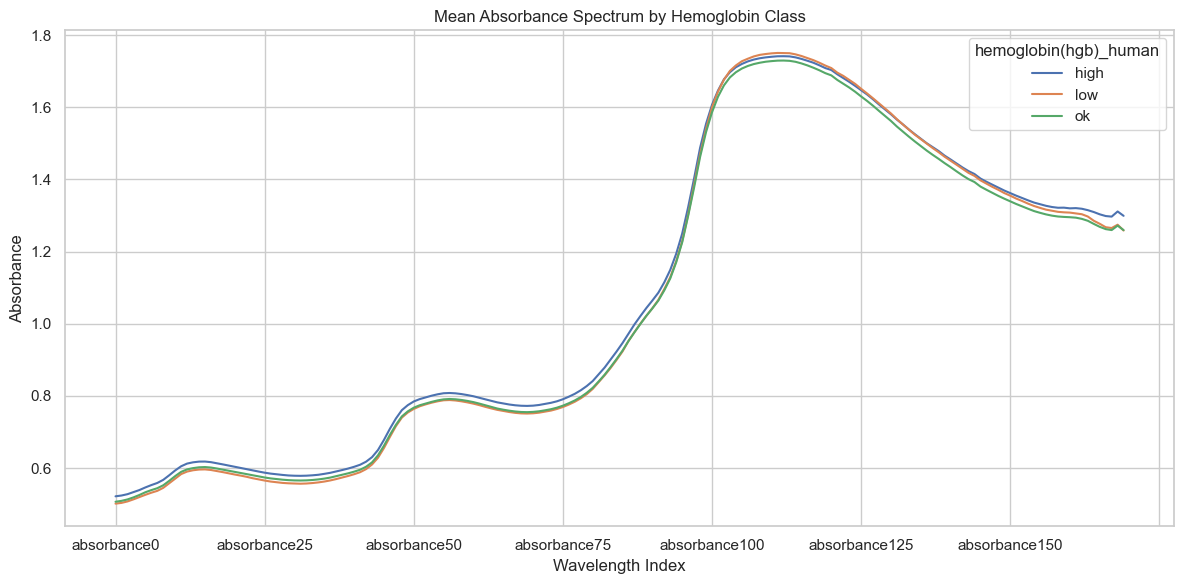

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Visualization style
sns.set(style="whitegrid")

# Load dataset
train = pd.read_csv("Train.csv")
train.columns = train.columns.str.lower()

# Absorbance features
abs_cols = [col for col in train.columns if col.startswith("absorbance")]
X_abs = train[abs_cols]
X_scaled = StandardScaler().fit_transform(X_abs)

# Determine number of components for ≥95% explained variance
pca_full = PCA().fit(X_scaled)
explained_variance_ratio = np.cumsum(pca_full.explained_variance_ratio_)
n_components_95 = np.argmax(explained_variance_ratio >= 0.95) + 1

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(explained_variance_ratio, marker='o')
plt.axhline(y=0.95, color='r', linestyle='--')
plt.axvline(x=n_components_95 - 1, color='r', linestyle='--')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.tight_layout()
plt.show()

# Apply PCA for 2D projection
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# PCA plot data
pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
pca_df["hdl"] = train["hdl_cholesterol_human"]
pca_df["ldl"] = train["cholesterol_ldl_human"]
pca_df["hgb"] = train["hemoglobin(hgb)_human"]

# 2D PCA projections
plt.figure(figsize=(9, 6))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="hdl", palette="Set1", alpha=0.6)
plt.title("PCA Projection Colored by HDL Class")
plt.tight_layout()
plt.show()

plt.figure(figsize=(9, 6))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="ldl", palette="Set2", alpha=0.6)
plt.title("PCA Projection Colored by LDL Class")
plt.tight_layout()
plt.show()

plt.figure(figsize=(9, 6))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="hgb", palette="Set3", alpha=0.6)
plt.title("PCA Projection Colored by Hemoglobin Class")
plt.tight_layout()
plt.show()

# Mean absorbance spectra
train.groupby("hdl_cholesterol_human")[abs_cols].mean().T.plot(figsize=(12, 6))
plt.title("Mean Absorbance Spectrum by HDL Class")
plt.xlabel("Wavelength Index")
plt.ylabel("Absorbance")
plt.tight_layout()
plt.show()

train.groupby("cholesterol_ldl_human")[abs_cols].mean().T.plot(figsize=(12, 6))
plt.title("Mean Absorbance Spectrum by LDL Class")
plt.xlabel("Wavelength Index")
plt.ylabel("Absorbance")
plt.tight_layout()
plt.show()

train.groupby("hemoglobin(hgb)_human")[abs_cols].mean().T.plot(figsize=(12, 6))
plt.title("Mean Absorbance Spectrum by Hemoglobin Class")
plt.xlabel("Wavelength Index")
plt.ylabel("Absorbance")
plt.tight_layout()
plt.show()


In [5]:
import pandas as pd

# Load dataset
train = pd.read_csv("Train.csv")
train.columns = train.columns.str.lower()

# HDL class distribution
hdl_distribution = train["hdl_cholesterol_human"].value_counts().to_frame(name="count")
hdl_distribution["ratio"] = hdl_distribution["count"] / hdl_distribution["count"].sum()

display(hdl_distribution)


,count,ratio
hdl_cholesterol_human,,
ok,7500,0.570776
low,3060,0.232877
high,2580,0.196347


In [6]:
pip install scikit-learn==1.2.2 xgboost==1.7.6


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_validate
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.preprocessing import LabelEncoder
from scipy.stats import randint, uniform
import joblib
import warnings

warnings.filterwarnings("ignore")

target_list = [
    "hdl_cholesterol_human",
    "cholesterol_ldl_human",
    "hemoglobin(hgb)_human"
]

X = train[[col for col in train.columns if col.startswith("absorbance")]]

param_dist = {
    "n_estimators": randint(50, 150),
    "max_depth": randint(2, 6),
    "learning_rate": uniform(0.05, 0.15),
    "subsample": uniform(0.7, 0.3),
    "colsample_bytree": uniform(0.7, 0.3),
    "gamma": uniform(0, 1),
    "reg_alpha": uniform(0, 0.5),
    "reg_lambda": uniform(0.5, 1),
}

for target in target_list:
    print(f"\n--- Processing target: {target} ---")
    
    y_raw = train[target]
    le = LabelEncoder()
    y = le.fit_transform(y_raw)
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=42
    )
    
    sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)
    
    base_model = XGBClassifier(
        objective="multi:softprob",
        num_class=len(np.unique(y)),
        eval_metric="mlogloss",
        random_state=42
    )
    
    search = RandomizedSearchCV(
        estimator=base_model,
        param_distributions=param_dist,
        n_iter=20,
        scoring="accuracy",
        cv=10,
        verbose=1,
        random_state=42,
        n_jobs=-1
    )
    
    search.fit(X_train, y_train, sample_weight=sample_weights)
    best_model = search.best_estimator_
 

    cv_results = cross_validate(
        best_model,
        X_train,
        y_train,
        cv=10,
        scoring=[
            "accuracy",
            "precision_macro",
            "recall_macro",
            "f1_macro",
            "roc_auc_ovr"
        ],
        return_train_score=False
    )
    
    print("\nCV metrics:")
    for metric, scores in cv_results.items():
        if "test" in metric:
            mname = metric.replace("test_", "")
            print(f"{mname.upper():<18}: {scores.mean():.4f} ± {scores.std():.4f}")
    
    y_pred = best_model.predict(X_test)
    y_pred_labels = le.inverse_transform(y_pred)
    y_test_labels = le.inverse_transform(y_test)
    
    report = classification_report(y_test_labels, y_pred_labels, output_dict=True)
    conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)
    roc_auc = roc_auc_score(pd.get_dummies(y_test), pd.get_dummies(y_pred), average='macro', multi_class='ovr')
    
    report_df = pd.DataFrame(report).T
    conf_matrix_df = pd.DataFrame(conf_matrix, index=le.classes_, columns=le.classes_)
    
    joblib.dump(best_model, f"xgb_{target}_best_model.joblib")
    
    print(f"\nTest ROC AUC (macro, OVR): {roc_auc:.4f}")
    display(report_df)
    display(conf_matrix_df)



--- Processing target: hdl_cholesterol_human ---
Fitting 10 folds for each of 20 candidates, totalling 200 fits

CV metrics:
ACCURACY          : 0.9774 ± 0.0039
PRECISION_MACRO   : 0.9812 ± 0.0034
RECALL_MACRO      : 0.9699 ± 0.0060
F1_MACRO          : 0.9753 ± 0.0045
ROC_AUC_OVR       : 0.9991 ± 0.0003

Test ROC AUC (macro, OVR): 0.9866


,precision,recall,f1-score,support
high,0.986408,0.984496,0.985451,516.000000
low,0.960000,0.980392,0.970089,612.000000
ok,0.990591,0.982667,0.986613,1500.000000
accuracy,0.982496,0.982496,0.982496,0.982496
macro avg,0.979000,0.982518,0.980718,2628.000000
weighted avg,0.982646,0.982496,0.982537,2628.000000


,high,low,ok
high,508,1,7
low,5,600,7
ok,2,24,1474



--- Processing target: cholesterol_ldl_human ---
Fitting 10 folds for each of 20 candidates, totalling 200 fits

CV metrics:
ACCURACY          : 0.9877 ± 0.0027
PRECISION_MACRO   : 0.9891 ± 0.0053
RECALL_MACRO      : 0.9795 ± 0.0103
F1_MACRO          : 0.9841 ± 0.0067
ROC_AUC_OVR       : 0.9992 ± 0.0004

Test ROC AUC (macro, OVR): 0.9883


,precision,recall,f1-score,support
high,0.981853,0.984674,0.983262,1044.000000
low,0.983333,0.983333,0.983333,120.000000
ok,0.989733,0.987705,0.988718,1464.000000
accuracy,0.986301,0.986301,0.986301,0.986301
macro avg,0.984973,0.985238,0.985104,2628.000000
weighted avg,0.986310,0.986301,0.986304,2628.000000


,high,low,ok
high,1028,2,14
low,1,118,1
ok,18,0,1446



--- Processing target: hemoglobin(hgb)_human ---
Fitting 10 folds for each of 20 candidates, totalling 200 fits

CV metrics:
ACCURACY          : 0.9867 ± 0.0039
PRECISION_MACRO   : 0.9755 ± 0.0068
RECALL_MACRO      : 0.9472 ± 0.0228
F1_MACRO          : 0.9606 ± 0.0136
ROC_AUC_OVR       : 0.9988 ± 0.0013

Test ROC AUC (macro, OVR): 0.9868


,precision,recall,f1-score,support
high,0.907216,0.977778,0.941176,180.000000
low,0.972477,0.981481,0.976959,108.000000
ok,0.997419,0.991026,0.994212,2340.000000
accuracy,0.989726,0.989726,0.989726,0.989726
macro avg,0.959038,0.983428,0.970782,2628.000000
weighted avg,0.990216,0.989726,0.989871,2628.000000


,high,low,ok
high,176,0,4
low,0,106,2
ok,18,3,2319


Processing hdl_cholesterol_human – Risk class: low


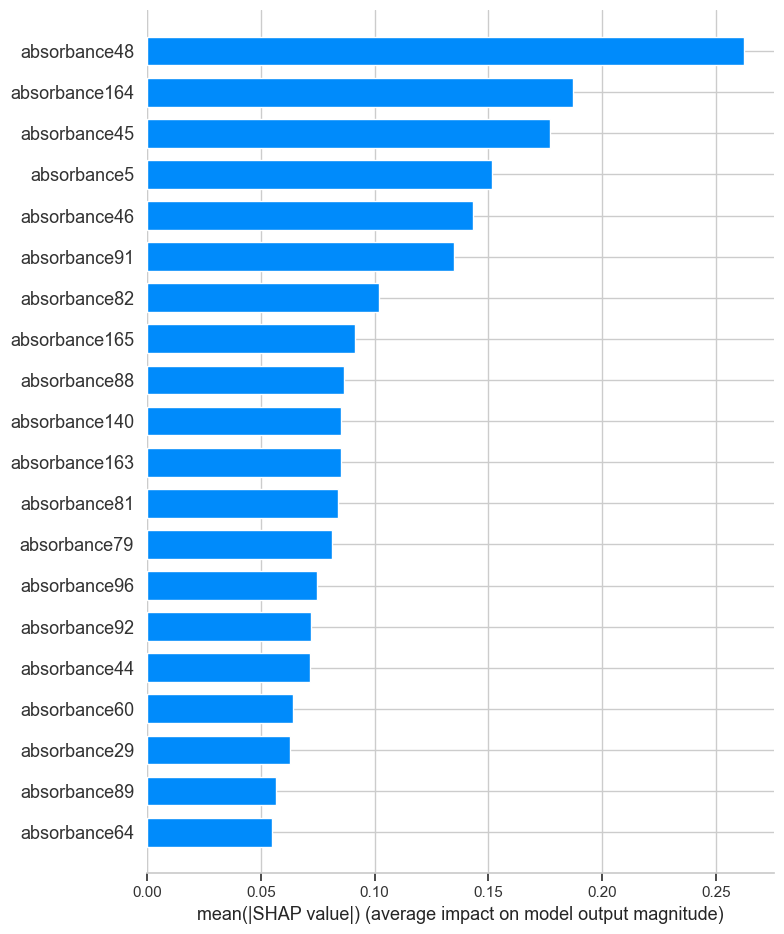

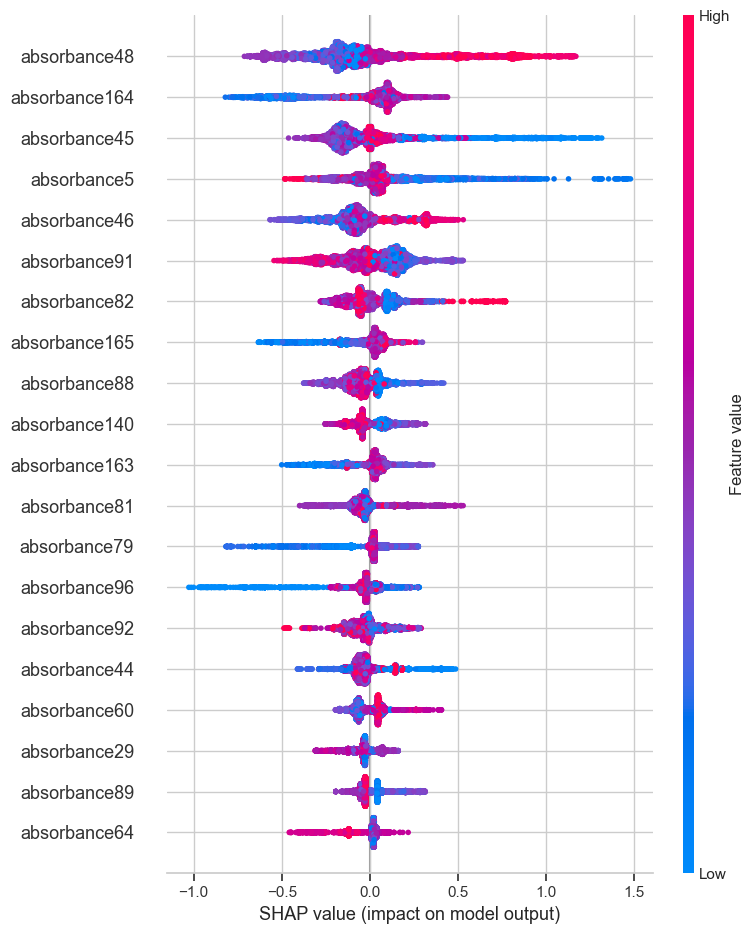

Processing cholesterol_ldl_human – Risk class: high


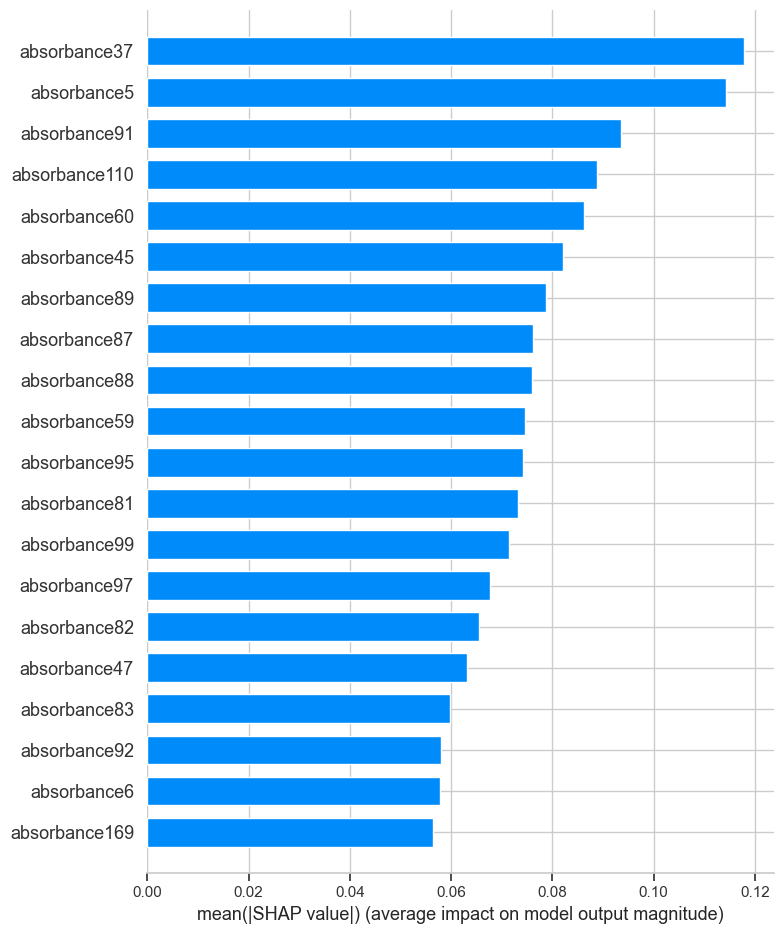

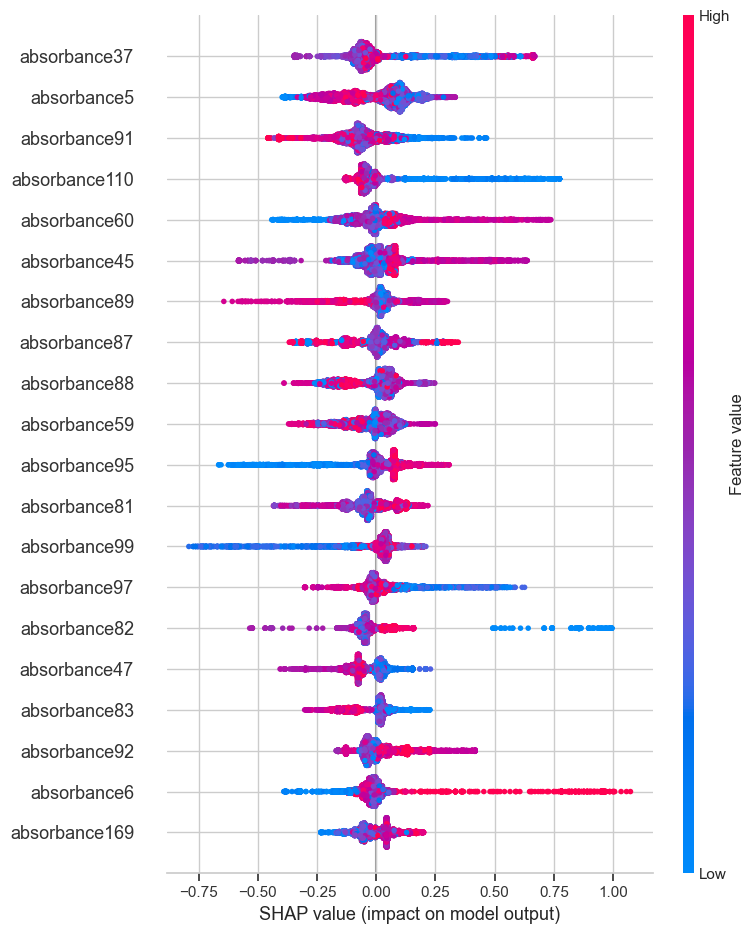

Processing hemoglobin(hgb)_human – Risk class: low


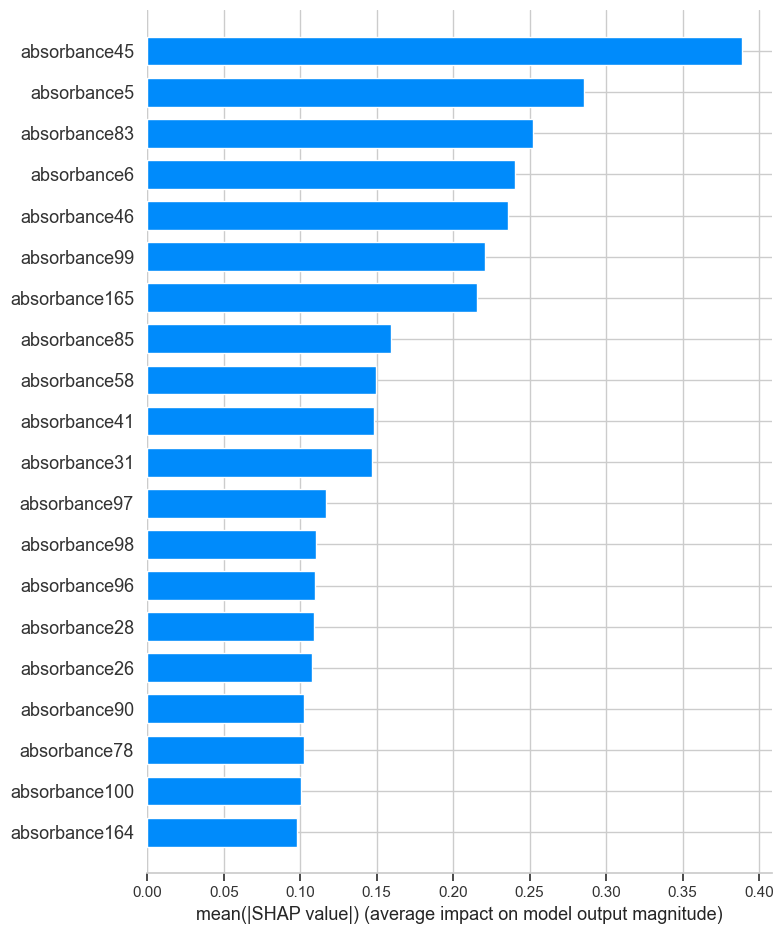

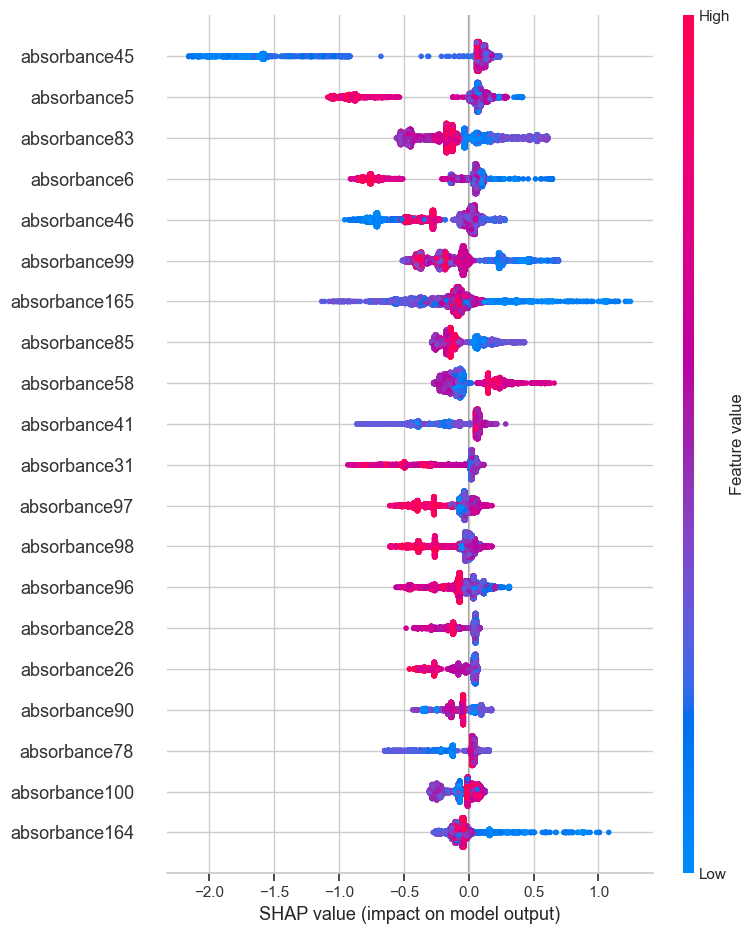

In [4]:
import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

shap.initjs()
sns.set(style="whitegrid")

train = pd.read_csv("Train.csv")
train.columns = train.columns.str.lower()

abs_cols = [col for col in train.columns if col.startswith("absorbance")]

risk_class_map = {
    "hdl_cholesterol_human": "low",
    "cholesterol_ldl_human": "high",
    "hemoglobin(hgb)_human": "low"
}

for target, risk_class in risk_class_map.items():
    print(f"Processing {target} – Risk class: {risk_class}")
    
    y_raw = train[target]
    le = LabelEncoder()
    y = le.fit_transform(y_raw)
    class_names = list(le.classes_)
    risk_index = class_names.index(risk_class)

    X = train[abs_cols]
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=42
    )

    model = joblib.load(f"xgb_{target}_best_model.joblib")

    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_train)

    risk_shap = shap_values[risk_index]

    shap.summary_plot(risk_shap, X_train, plot_type="bar")
    shap.summary_plot(risk_shap, X_train)


In [5]:
import pandas as pd
import numpy as np

train = pd.read_csv("Train.csv")
train.columns = train.columns.str.lower()

abs_cols = [col for col in train.columns if col.startswith("absorbance")]
abs_data = train[abs_cols]

q1 = abs_data.quantile(0.25)
q3 = abs_data.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outlier_mask = (abs_data < lower_bound) | (abs_data > upper_bound)
outlier_counts = outlier_mask.sum(axis=0)
outlier_counts = outlier_counts[outlier_counts > 0].sort_values(ascending=False)

print(outlier_counts)


absorbance0      406
absorbance1      396
absorbance2      387
absorbance3      361
absorbance7      340
                ... 
absorbance101     85
absorbance95      65
absorbance94      61
absorbance92      20
absorbance93      16
Length: 170, dtype: int64


In [6]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_validate
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import warnings

warnings.filterwarnings("ignore")

train = pd.read_csv("Train.csv")
train.columns = train.columns.str.lower()

target_list = [
    "hdl_cholesterol_human",
    "cholesterol_ldl_human",
    "hemoglobin(hgb)_human"
]

abs_cols = [col for col in train.columns if col.startswith("absorbance")]
X = train[abs_cols]

param_dist = {
    "penalty": ["l1", "l2", "elasticnet"],
    "C": np.logspace(-4, 4, 20),
    "solver": ["saga"],
    "max_iter": [500, 1000, 2000],
    "l1_ratio": np.linspace(0, 1, 10)
}

for target in target_list:
    print(f"\n--- Processing target: {target} ---")

    y_raw = train[target]
    le = LabelEncoder()
    y = le.fit_transform(y_raw)

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=42
    )

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    pca = PCA(n_components=49)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

    base_model = LogisticRegression(multi_class="multinomial", class_weight=None)

    search = RandomizedSearchCV(
        estimator=base_model,
        param_distributions=param_dist,
        n_iter=50,
        scoring="accuracy",
        cv=10,
        verbose=1,
        random_state=42,
        n_jobs=-1
    )

    search.fit(X_train_pca, y_train, sample_weight=sample_weights)
    best_model = search.best_estimator_

    joblib.dump(best_model, f"logreg_{target}_best_model.joblib")

    cv_results = cross_validate(
        best_model,
        X_train_pca,
        y_train,
        cv=10,
        scoring=[
            "accuracy",
            "precision_macro",
            "recall_macro",
            "f1_macro",
            "roc_auc_ovr"
        ],
        return_train_score=False
    )

    print("\nCV metrics:")
    for metric, scores in cv_results.items():
        if "test" in metric:
            mname = metric.replace("test_", "")
            print(f"{mname.upper():<18}: {scores.mean():.4f} ± {scores.std():.4f}")

    y_pred = best_model.predict(X_test_pca)
    y_pred_labels = le.inverse_transform(y_pred)
    y_test_labels = le.inverse_transform(y_test)

    report = classification_report(y_test_labels, y_pred_labels, output_dict=True)
    conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)
    roc_auc = roc_auc_score(pd.get_dummies(y_test), pd.get_dummies(y_pred), average='macro', multi_class='ovr')

    report_df = pd.DataFrame(report).T
    conf_matrix_df = pd.DataFrame(conf_matrix, index=le.classes_, columns=le.classes_)

    print(f"\nTest ROC AUC (macro, OVR): {roc_auc:.4f}")
    display(report_df)
    display(conf_matrix_df)



--- Processing target: hdl_cholesterol_human ---
Fitting 10 folds for each of 50 candidates, totalling 500 fits

CV metrics:
ACCURACY          : 0.5775 ± 0.0062
PRECISION_MACRO   : 0.5793 ± 0.0491
RECALL_MACRO      : 0.3558 ± 0.0080
F1_MACRO          : 0.2966 ± 0.0136
ROC_AUC_OVR       : 0.6628 ± 0.0162

Test ROC AUC (macro, OVR): 0.6260


,precision,recall,f1-score,support
high,0.338535,0.546512,0.418087,516.000000
low,0.371981,0.503268,0.427778,612.000000
ok,0.720786,0.464667,0.565059,1500.000000
accuracy,0.489726,0.489726,0.489726,0.489726
macro avg,0.477101,0.504815,0.470308,2628.000000
weighted avg,0.564504,0.489726,0.504232,2628.000000


,high,low,ok
high,282,117,117
low,151,308,153
ok,400,403,697



--- Processing target: cholesterol_ldl_human ---
Fitting 10 folds for each of 50 candidates, totalling 500 fits

CV metrics:
ACCURACY          : 0.5571 ± 0.0004
PRECISION_MACRO   : 0.1857 ± 0.0001
RECALL_MACRO      : 0.3333 ± 0.0000
F1_MACRO          : 0.2385 ± 0.0001
ROC_AUC_OVR       : 0.5000 ± 0.0000

Test ROC AUC (macro, OVR): 0.5000


,precision,recall,f1-score,support
high,0.000000,0.000000,0.000000,1044.000000
low,0.045662,1.000000,0.087336,120.000000
ok,0.000000,0.000000,0.000000,1464.000000
accuracy,0.045662,0.045662,0.045662,0.045662
macro avg,0.015221,0.333333,0.029112,2628.000000
weighted avg,0.002085,0.045662,0.003988,2628.000000


,high,low,ok
high,0,1044,0
low,0,120,0
ok,0,1464,0



--- Processing target: hemoglobin(hgb)_human ---
Fitting 10 folds for each of 50 candidates, totalling 500 fits

CV metrics:
ACCURACY          : 0.8897 ± 0.0019
PRECISION_MACRO   : 0.5523 ± 0.0718
RECALL_MACRO      : 0.3673 ± 0.0130
F1_MACRO          : 0.3742 ± 0.0190
ROC_AUC_OVR       : 0.8229 ± 0.0135

Test ROC AUC (macro, OVR): 0.7567


,precision,recall,f1-score,support
high,0.173410,0.666667,0.275229,180.000000
low,0.181633,0.824074,0.297659,108.000000
ok,0.968880,0.598718,0.740095,2340.000000
accuracy,0.612633,0.612633,0.612633,0.612633
macro avg,0.441308,0.696486,0.437661,2628.000000
weighted avg,0.882043,0.612633,0.690073,2628.000000


,high,low,ok
high,120,25,35
low,9,89,10
ok,563,376,1401


In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

train = pd.read_csv("Train.csv")
train.columns = train.columns.str.lower()

abs_cols = [col for col in train.columns if col.startswith("absorbance")]
X = train[abs_cols]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

print(f"Explained variance (first 49 components): {pca.explained_variance_ratio_[:49].sum():.4f}")


Explained variance (first 49 components): 0.9993
